In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

**ĐỌC DỮ LIỆU VÀ KIỂM TRA DỮ LIỆU**

In [2]:
# Đọc dữ liệu huấn luyện và kiểm tra
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


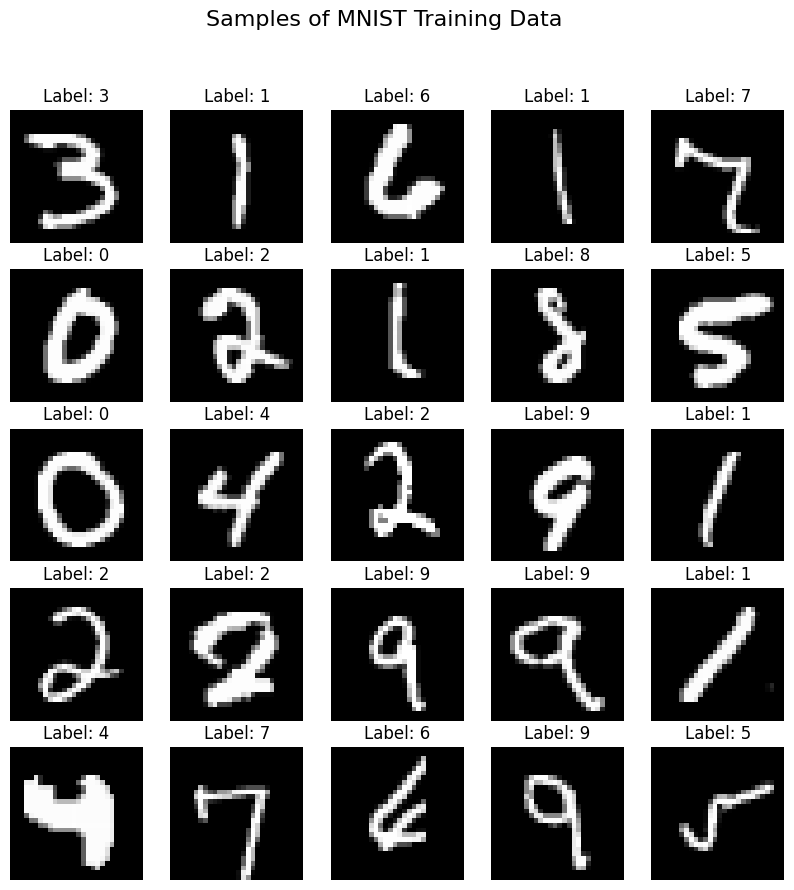

In [3]:
# Chọn một số mẫu ngẫu nhiên từ tập dữ liệu huấn luyện để hiển thị
num_samples = 25
random_indices = np.random.choice(train_images.shape[0], num_samples, replace=False)
sample_images = train_images[random_indices]

# Hiển thị các mẫu ảnh trong lưới
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[random_indices[i]]}")
    plt.axis('off')
plt.suptitle('Samples of MNIST Training Data', fontsize=16)
plt.show()

**SOFTMAX REGRESSION**

In [4]:
def convert_labels(y, C):
  from scipy import sparse
  Y = sparse.coo_matrix((np.ones_like(y),
  (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y
def softmax(Z):
  e_Z = np.exp(Z)
  A = e_Z / e_Z.sum(axis = 0)
  return A
def softmax_stable(Z):
  e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
  A = e_Z / e_Z.sum(axis = 0)
  return A
def pred(W, X):
  A = softmax_stable(W.T.dot(X))
  return np.argmax(A, axis = 0)

In [5]:
def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
  from sklearn.metrics import log_loss
  losses = []
  _theta = theta
  d, N = X.shape
  for iter_ in range(iterations):
    shuffle_index = np.random.permutation(N)
    for i in shuffle_index:
      xi = X[:, i].reshape(d, 1)
      yi = Y[:, i].reshape(10, 1)
      ai = softmax_stable(np.dot(_theta.T, xi))
      _theta += learning_rate * xi.dot((yi - ai).T)
      if (iter_ * N + i) % batch_size == 0:
        Y_hat = np.dot(_theta.T, X)
        losses.append(log_loss(Y, Y_hat))
    Y_hat = np.dot(_theta.T, X)
    print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
  return _theta, losses

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], -1).T
y_train = convert_labels(y_train, 10)
theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, y_train, theta)
print('Training success: ', opt_theta.shape, len(losses))

epoch 0 - cost 1.0184887403037983
epoch 1 - cost 1.0144197817240626
epoch 2 - cost 1.0136973156130542
epoch 3 - cost 1.0145574236225283
epoch 4 - cost 1.012734106303412
epoch 5 - cost 1.0142390652727988
epoch 6 - cost 1.0138130246115828
epoch 7 - cost 1.014023629524751
epoch 8 - cost 1.0127455629972684
epoch 9 - cost 1.0109713749253044
epoch 10 - cost 1.0159425947015297
epoch 11 - cost 1.010081567794025
epoch 12 - cost 1.0126043375273757
epoch 13 - cost 1.0141717827248709
epoch 14 - cost 1.009707112110746
epoch 15 - cost 1.012479900290826
epoch 16 - cost 1.012198323073757
epoch 17 - cost 1.009835182108806
epoch 18 - cost 1.0138215013774627
epoch 19 - cost 1.0117984721866309
Training success:  (784, 10) 4800


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], -1).T
print('accuracy training data: ', accuracy_score(y_train,
pred(opt_theta, X_train)))

X_val = X_val.reshape(X_val.shape[0], -1).T

print(X_val.shape)
print('accuracy testing data: ', accuracy_score(y_val,pred(opt_theta, X_val)))

conf_matrix = confusion_matrix(y_val, pred(opt_theta, X_val))
print('Confusion Matrix:\n', conf_matrix)

precision = precision_score(y_val, pred(opt_theta, X_val), average='macro')
recall = recall_score(y_val, pred(opt_theta, X_val), average='macro')

print('Precision:', precision)
print('Recall:', recall)


accuracy training data:  0.8933958333333333
(784, 12000)
accuracy testing data:  0.8766666666666667
Confusion Matrix:
 [[1128    0   10    1    1    4    4    5   10   12]
 [   0 1246   11    6    0    0    1    1   43   14]
 [   2   12 1053   18   10    3   10   10   38   18]
 [  10    7   41 1022    1   33    2    4   39   60]
 [   1    2    8    0  967    1    8    2    8  179]
 [  24    2   27   41    4  844    4    3  110   45]
 [  10    0   45    3   15   19 1061    4   15    5]
 [   5    5    8   11    4    1    0 1063    5  197]
 [   2   12   15   26    4   22    6    1 1004   68]
 [   4    2    6    4   10    4    0   23    9 1132]]
Precision: 0.8898604746122183
Recall: 0.8757965776055526
